In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 
import geopandas as gpd

In [3]:
gebiete = gpd.read_file("MunichModel_shape/Gebiete.shp")
abschnitte = gpd.read_file("MunichModel_shape/Abschnitte.shp")
knoten = gpd.read_file("MunichModel_shape/Knoten.shp")

/tmp/ipykernel_11965/668333325.py:72: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


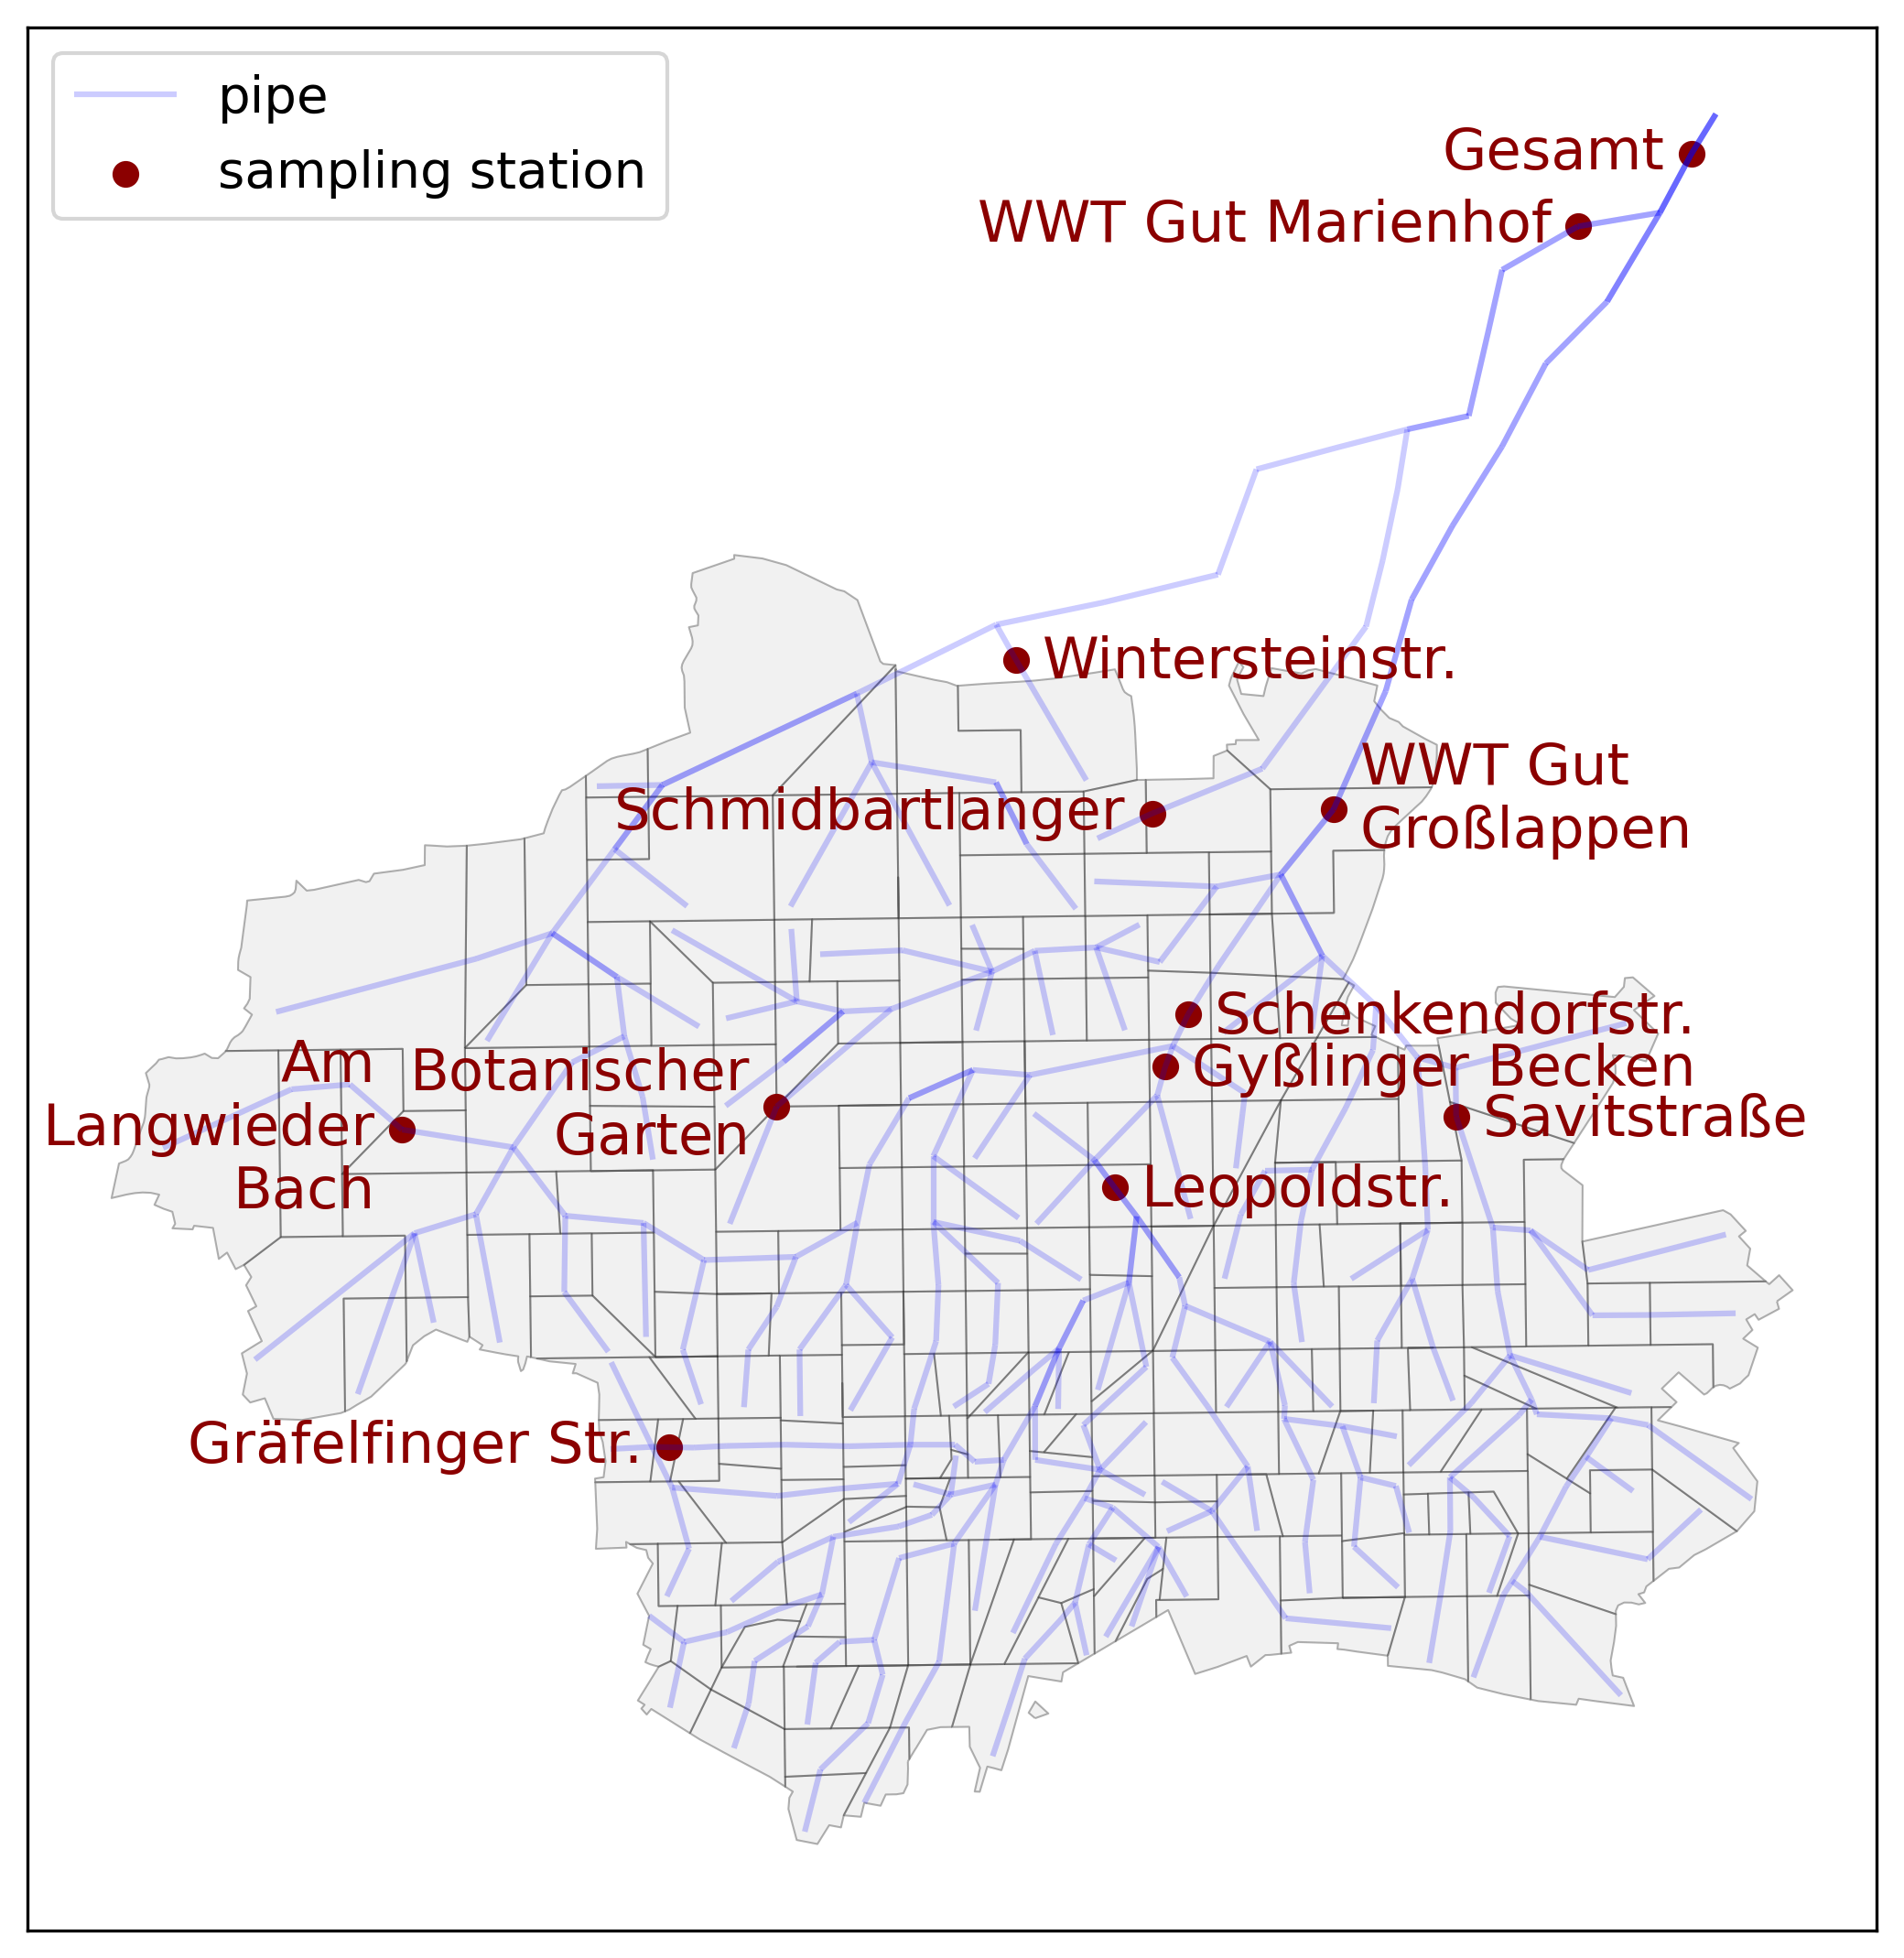

In [5]:
fig, ax = plt.subplots(figsize=(10,9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, label='Gebiete', alpha=0.3)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.2)
knoten.plot(ax=ax, color='darkred', label='sampling station')

txt_color = "darkred"

# Add labels to each Knoten point
knoten["name"] = ["Schmidbartlanger",  # 0
                  "Schenkendorfstr.", 
                  "Botanischer\nGarten", #2
                  "Gräfelfinger Str.", 
                  "Am\nLangwieder\nBach", # 4
                  "Gesamt", "Leopoldstr.", 
                  "WWT Gut Marienhof", 
                  "Gyßlinger Becken", 
                  "WWT Gut\nGroßlappen", # 8
                  "Savitstraße", 
                  "Wintersteinstr."]


for idx, row in knoten.iloc[[1,6,8,10,11]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color)

row = knoten.iloc[9]
ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -10), textcoords="offset points", color=txt_color)

row = knoten.iloc[4]
ax.annotate(
    text=row['name'], 
    xy=(row.geometry.x, row.geometry.y),
    xytext=(-7, 0),
    textcoords="offset points",
    color=txt_color,
    ha='right', 
    va='center'
)

row = knoten.iloc[2]
ax.annotate(
    text=row['name'], 
    xy=(row.geometry.x, row.geometry.y),
    xytext=(-7, 0),
    textcoords="offset points",
    color=txt_color,
    ha='right', 
    va='center'
)


for idx, row in knoten.iloc[[0, 3, 5, 7]].iterrows():
    ax.annotate(
        text=row['name'], 
        xy=(row.geometry.x, row.geometry.y),
        xytext=(-7, 0),
        textcoords="offset points",
        color=txt_color,
        ha='right', 
        va='center'
    )

ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set

plt.legend()
plt.savefig("plots/overview_maps/MunichModel.png", dpi=300, bbox_inches='tight')

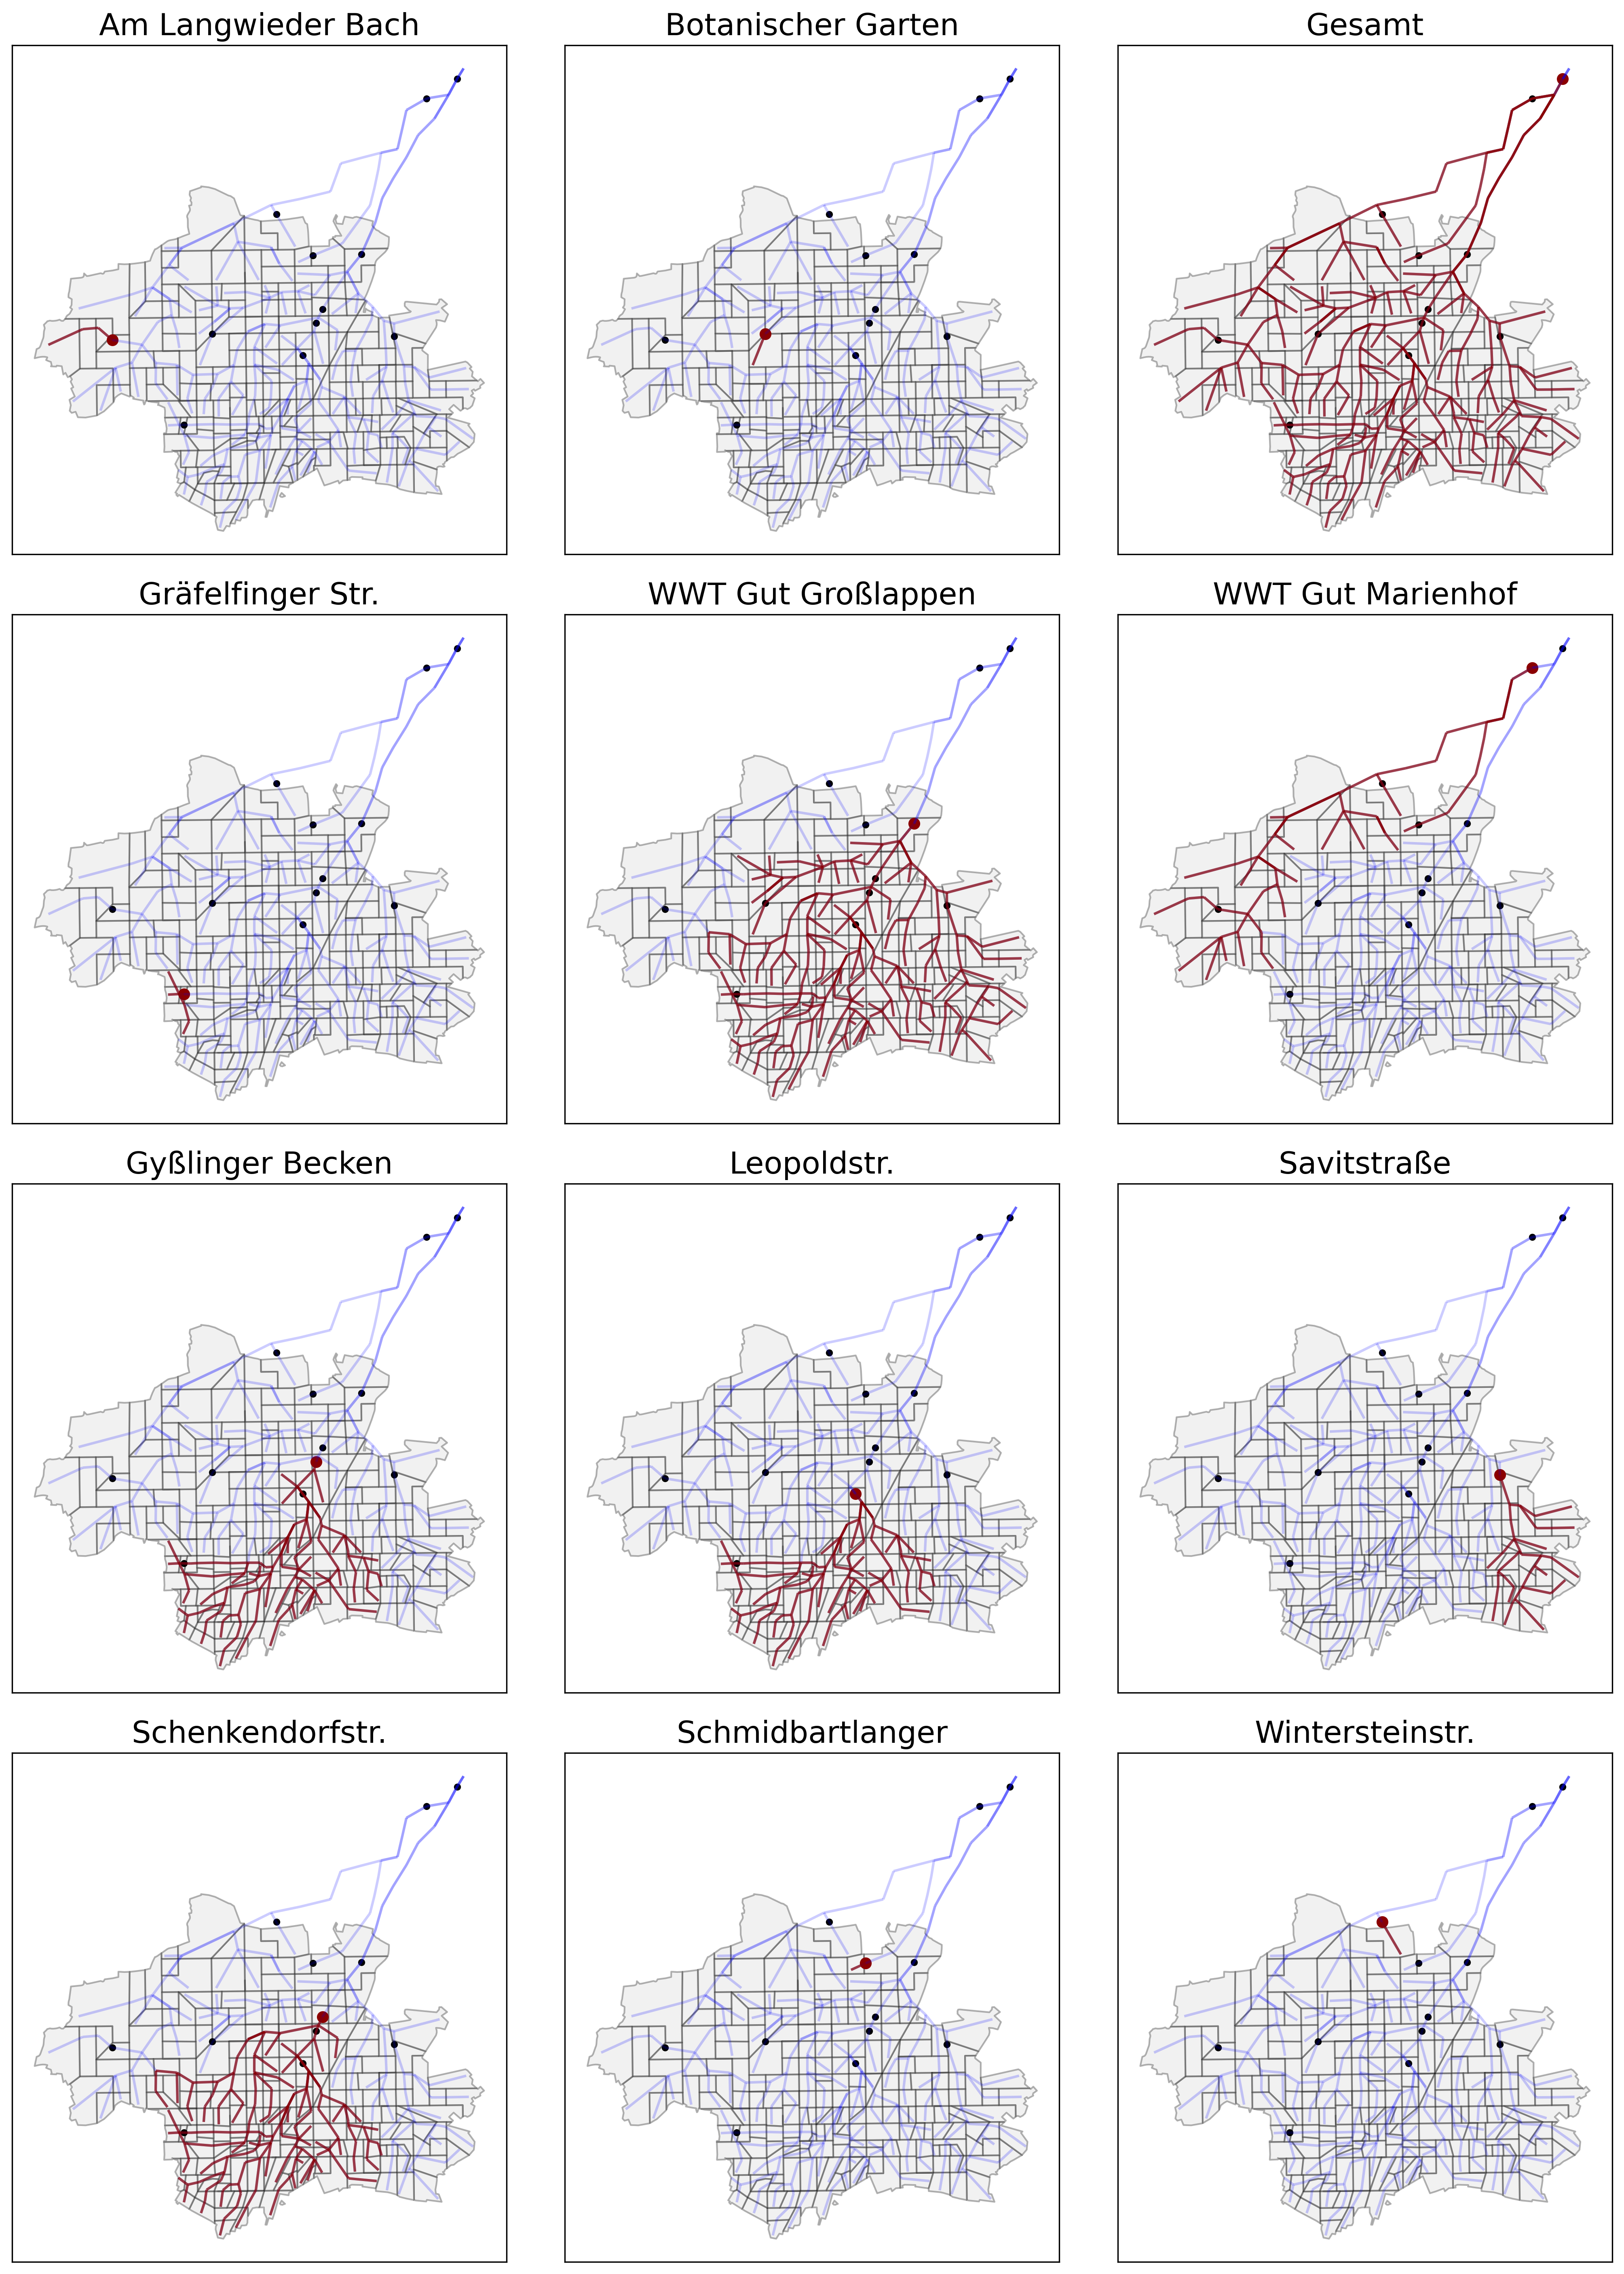

In [29]:
station_names = ["am_langwieder_bach", "botanischer_garten", "gesamt", "gräfelfinger_str", 
                     "gut_großlappen", "gut_marienhof", "gyßlinger_becken", "leopoldstr", "savitstr", "schenkendorfstr", "schmidbartlangerstr", "wintersteinstr"]

knoten_names = ["Am\nLangwieder\nBach", "Botanischer\nGarten", "Gesamt", "Gräfelfinger Str.",
                "WWT Gut\nGroßlappen", "WWT Gut Marienhof", "Gyßlinger Becken", "Leopoldstr.", 
                "Savitstraße", "Schenkendorfstr.", "Schmidbartlanger", "Wintersteinstr."]

fig, axes = plt.subplots(4, 3, figsize=(14, 19), dpi=300)
axes = axes.flatten()  

for idx, station_name in enumerate(station_names):
    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/{station_name}/Abschnitte.shp")

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.3)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2)
    knoten.plot(ax=ax, color='black', markersize=10)

    knoten.loc[knoten['name'] == knoten_names[idx]].plot(ax=ax, color='darkred')

    highlight_abschnitt.plot(ax=ax, color='darkred', alpha=0.7)

    # Titles, clean axes
    ax.set_title(knoten_names[idx].replace("\n", " "))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("plots/overview_maps/overview_upstream.png", dpi=300, bbox_inches='tight')